# Cyklooxygenáza 1
(https://www.ebi.ac.uk/chembl/target_report_card/CHEMBL221/)

- zdroj: ChEMBL (https://www.ebi.ac.uk/chembl/)
- pochází z Homo Sapiens
- sloučenin bylo 4144 s IC50

In [2]:
import pandas as pd
import csv

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

# Processing the obtained ligand set

In [4]:
# let's have a look at the csv:
import csv
with open('data/cyclooxygenase_1.csv', 'r') as csvfile: # for you it will probably be just open('filename.csv', 'r')
    reader = csv.DictReader(csvfile, delimiter=";") # gotcha, it's delimited by ; despite being called a CSV
    rawdata = [x for x in reader] # a list of rows within the csv
rawdata[0] # peek at the first element, just to get an idea what they look like.
#reader returns ordered dictionaries, one for each row

OrderedDict([('Molecule ChEMBL ID', 'CHEMBL270043'),
             ('Molecule Name', ''),
             ('Molecule Max Phase', '0'),
             ('Molecular Weight', '306.34'),
             ('#RO5 Violations', '0'),
             ('AlogP', '1.80'),
             ('Compound Key', '22'),
             ('Smiles', 'COc1ccc(/C=N/c2ccc(S(N)(=O)=O)cc2)cc1O'),
             ('Standard Type', 'IC50'),
             ('Standard Relation', "'='"),
             ('Standard Value', '43800.0'),
             ('Standard Units', 'nM'),
             ('pChEMBL Value', '4.36'),
             ('Data Validity Comment', ''),
             ('Comment', ''),
             ('Uo Units', 'UO_0000065'),
             ('Ligand Efficiency BEI', '14.23'),
             ('Ligand Efficiency LE', '0.28'),
             ('Ligand Efficiency LLE', '2.56'),
             ('Ligand Efficiency SEI', '4.27'),
             ('Potential Duplicate', 'False'),
             ('Assay ChEMBL ID', 'CHEMBL932254'),
             ('Assay Description',
    

# Předzpracování dat

- dávat si pozor na IC50 - hlavně jednotky
- odstranění sloučenin s jinými jednotkami nebo s hodnotou NaN

### Načtení dat

In [19]:
raw_df = pd.read_csv('data/cyclooxygenase_1.csv', sep=';') 
display(raw_df)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL270043,NaN,0,306.34,0,1.80,22,COc1ccc(/C=N/c2ccc(S(N)(=O)=O)cc2)cc1O,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1141614,1,Scientific Literature,Bioorg. Med. Chem.,2008.0,None,NaN
1,CHEMBL270264,NaN,0,306.34,0,1.80,19,COc1cc(/C=N/c2ccc(S(N)(=O)=O)cc2)ccc1O,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1141614,1,Scientific Literature,Bioorg. Med. Chem.,2008.0,None,NaN
2,CHEMBL260386,NaN,0,281.24,0,2.93,22,Nc1ccc(C(=O)Nc2ccc(C(F)(F)F)cc2)nc1,IC50,'>',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1144769,1,Scientific Literature,J. Med. Chem.,2008.0,None,NaN
3,CHEMBL259972,MOFEZOLAC,0,339.35,0,3.65,"4, mofezolac",COc1ccc(-c2noc(CC(=O)O)c2-c2ccc(OC)cc2)cc1,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1144769,1,Scientific Literature,J. Med. Chem.,2008.0,None,NaN
4,CHEMBL122,ROFECOXIB,4,314.36,0,2.56,Rofecoxib,CS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)OC2)cc1,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1145760,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2003.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,CHEMBL26915,SC-560,0,352.74,1,5.22,SC-560,COc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc2)cc1,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL4049457,1,Scientific Literature,J Med Chem,2017.0,None,NaN
4110,CHEMBL4242256,NaN,0,593.04,2,7.10,e18,Cc1ccc(-n2nc(COC(=O)COc3cc(O)c4c(=O)cc(-c5cccc...,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL4229460,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN
4111,CHEMBL3918115,NaN,0,322.41,0,4.74,BDBM236653,CC(C)(C)C1=NN(c2ccc(C(=O)O)cc2)C(c2ccccc2)C1,IC50,'>',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL3886798,37,BindingDB Database,NaN,2016.0,None,NaN
4112,CHEMBL3921118,NaN,0,376.45,0,4.43,BDBM236656,CC(C)(C)C1=NN(c2ccc(S(=O)(=O)O)cc2)C(c2ccc(F)c...,IC50,'>',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL3886798,37,BindingDB Database,NaN,2016.0,None,NaN


výpis jednotek pro IC50 a počet sloučenin obsahující dané jednotky

In [20]:
print(raw_df['Standard Type'].unique())
print(raw_df['Standard Units'].unique())
print(raw_df['Standard Units'].value_counts())
print('nan\t',sum(pd.isnull(raw_df['Standard Units'])))

['IC50']
['nM' nan 'ug.mL-1' 'ug' '%']
nM         3193
ug.mL-1       5
%             2
ug            1
Name: Standard Units, dtype: int64
nan	 913


913 sloučenin obsahuje hodnotu IC50 NAN a jednotky jsou NAN

tyto sloučeniny vyřadím

In [21]:
df_nan = raw_df[(df['Standard Units'].isnull())]
df_nan[['Smiles','Standard Value','Standard Units']]

,Smiles,Standard Value,Standard Units
6,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,NaN,NaN
7,O=C1CN=C(c2ccccc2Cl)c2cc([N+](=O)[O-])ccc2N1,NaN,NaN
9,Cc1ccc(N(CC2=NCCN2)c2cccc(O)c2)cc1,NaN,NaN
13,N[C@@H](Cc1ccc(N(CCCl)CCCl)cc1)C(=O)O,NaN,NaN
35,N[C@@H](Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1)C(=O)O,NaN,NaN
...,...,...,...
4086,Nc1nc(F)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@...,NaN,NaN
4100,Nc1cc(N2CCCCC2)nc(N)[n+]1[O-],NaN,NaN
4103,CC(C)C[C@H](NC(=O)[C@@H](O)[C@H](N)Cc1ccccc1)C...,NaN,NaN
4104,Clc1ccccc1CN1CCc2sccc2C1,NaN,NaN


In [22]:
# dfwn dataframe without nan
df=raw_df[(raw_df['Standard Units'] == 'nM')]

In [23]:
# kontrola počtu řádků, celkový počet sloučenin je 4105, sloučenin s NAN + a jinými jednotkami než je nM je dohromady 921
# celkový počet řádků bez jiných jednotek by mělo být 3184
print(df['Standard Units'].unique())
# print(type(dfwn))
print(len(df.index))
display(df)

['nM']
3193


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL270043,NaN,0,306.34,0,1.80,22,COc1ccc(/C=N/c2ccc(S(N)(=O)=O)cc2)cc1O,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1141614,1,Scientific Literature,Bioorg. Med. Chem.,2008.0,None,NaN
1,CHEMBL270264,NaN,0,306.34,0,1.80,19,COc1cc(/C=N/c2ccc(S(N)(=O)=O)cc2)ccc1O,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1141614,1,Scientific Literature,Bioorg. Med. Chem.,2008.0,None,NaN
2,CHEMBL260386,NaN,0,281.24,0,2.93,22,Nc1ccc(C(=O)Nc2ccc(C(F)(F)F)cc2)nc1,IC50,'>',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1144769,1,Scientific Literature,J. Med. Chem.,2008.0,None,NaN
3,CHEMBL259972,MOFEZOLAC,0,339.35,0,3.65,"4, mofezolac",COc1ccc(-c2noc(CC(=O)O)c2-c2ccc(OC)cc2)cc1,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1144769,1,Scientific Literature,J. Med. Chem.,2008.0,None,NaN
4,CHEMBL122,ROFECOXIB,4,314.36,0,2.56,Rofecoxib,CS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)OC2)cc1,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL1145760,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2003.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,CHEMBL26915,SC-560,0,352.74,1,5.22,SC-560,COc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc2)cc1,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL4049457,1,Scientific Literature,J Med Chem,2017.0,None,NaN
4110,CHEMBL4242256,NaN,0,593.04,2,7.10,e18,Cc1ccc(-n2nc(COC(=O)COc3cc(O)c4c(=O)cc(-c5cccc...,IC50,'=',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL4229460,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN
4111,CHEMBL3918115,NaN,0,322.41,0,4.74,BDBM236653,CC(C)(C)C1=NN(c2ccc(C(=O)O)cc2)C(c2ccccc2)C1,IC50,'>',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL3886798,37,BindingDB Database,NaN,2016.0,None,NaN
4112,CHEMBL3921118,NaN,0,376.45,0,4.43,BDBM236656,CC(C)(C)C1=NN(c2ccc(S(=O)(=O)O)cc2)C(c2ccc(F)c...,IC50,'>',...,Cyclooxygenase-1,Homo sapiens,SINGLE PROTEIN,CHEMBL3886798,37,BindingDB Database,NaN,2016.0,None,NaN


There are many different values, though we are for now interested in two things only: IDs and structures of known ligands. IDS are in the "Molecule ChEMBL ID" column, and structures are encoded within the "Smiles" column, in the [SMILES format](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system), which you probably already know from the lectures.

Je zde mnoho odlišných hodnot, avšak my se zajímáme jen o dvě věci: ID a struktury známých ligandů. ID jsou ve sloupci 
    "Molecule ChEMBL ID" a struktury jsou zakódovány ve sloupci "Smiles" ve [SMILES formátu](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system), který už pravděpodobně známe
    z minulé lekce.

In [25]:
# podivam se, jestli nejsou nekde nan hodnoty - nejsou zadne slouceniny, ktere by mely NaN hodnotu v ID nebo Smiles
print('nan ID\t',sum(pd.isnull(dfwn['Molecule ChEMBL ID'])))
print('nan smiles\t',sum(pd.isnull(dfwn['Smiles'])))

print(df['Molecule ChEMBL ID']) # getting first substance ID
print(df['Smiles']) # getting first substance structure in SMILES

nan ID	 0
nan smiles	 0
0        CHEMBL270043
1        CHEMBL270264
2        CHEMBL260386
3        CHEMBL259972
4           CHEMBL122
            ...      
4109      CHEMBL26915
4110    CHEMBL4242256
4111    CHEMBL3918115
4112    CHEMBL3921118
4113        CHEMBL527
Name: Molecule ChEMBL ID, Length: 3193, dtype: object
0                  COc1ccc(/C=N/c2ccc(S(N)(=O)=O)cc2)cc1O
1                  COc1cc(/C=N/c2ccc(S(N)(=O)=O)cc2)ccc1O
2                     Nc1ccc(C(=O)Nc2ccc(C(F)(F)F)cc2)nc1
3              COc1ccc(-c2noc(CC(=O)O)c2-c2ccc(OC)cc2)cc1
4              CS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)OC2)cc1
                              ...                        
4109          COc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc2)cc1
4110    Cc1ccc(-n2nc(COC(=O)COc3cc(O)c4c(=O)cc(-c5cccc...
4111         CC(C)(C)C1=NN(c2ccc(C(=O)O)cc2)C(c2ccccc2)C1
4112    CC(C)(C)C1=NN(c2ccc(S(=O)(=O)O)cc2)C(c2ccc(F)c...
4113            CN1C(C(=O)Nc2ccccn2)=C(O)c2ccccc2S1(=O)=O
Name: Smiles, Length: 3193, dtype: object


Now that we made some sense of the data, let's create RDKit molecule instances from the SMILES strings. Maybe just put the generated RDKit molecule instances as a new entry in the already existing dictionaries, or create separate lists. You can do whatever you feel most comfortable with. I will do the lists here, so the C-family guys can get a bit of respite from all the Pythonisms :)

### Teď uděláme smysluplná data, vytvoříme RDKit molekulové instance ze SMILES řetězce. Možná jen dát vygenerovat
RDKit molekulové instance jako nový vstup v už existujících slovnících nebo vytvořit separovaný seznam/list. Ty můžeš použít cokoli, co ti nejvíce vyhovuje. Já zde udělám seznam/list, tak že C-programátoři si mohou trochu oddechnout od všeho Pythonismu. :D 

In [36]:
# pro kontrolu, ale uz jsem radky s hodnotami NaN odstranovala
ligand_ids = df['Molecule ChEMBL ID']
ligand_mols = [Chem.MolFromSmiles(row['Smiles']) for index, row, in df.iterrows()]

# the two lists are aligned, so that the ids and the associated structures are in the same order
len(ligand_ids), len(ligand_mols) # sizes are the same, good

(3193, 3193)

In [37]:
[x for x in ligand_mols if not x] # no empty value in the RDKit molecule instance list, so they all parsed ok

[]

Let's redo the ring count from the first lecture on our shiny new dataset:

Zopakujme výpočet počtu kruhů z první lekce na novém datasetu. 

In [45]:
ligand_rings = [Chem.GetSSSR(ligand) for ligand in ligand_mols]
# ligand_rings[0] # have a look at ring count of the first molecule

[2, 2, 2, 3, 3, 4, 2, 3, 5, 1, 2, 2, 3, 2, 2, 3, 2, 2, 2, 4]


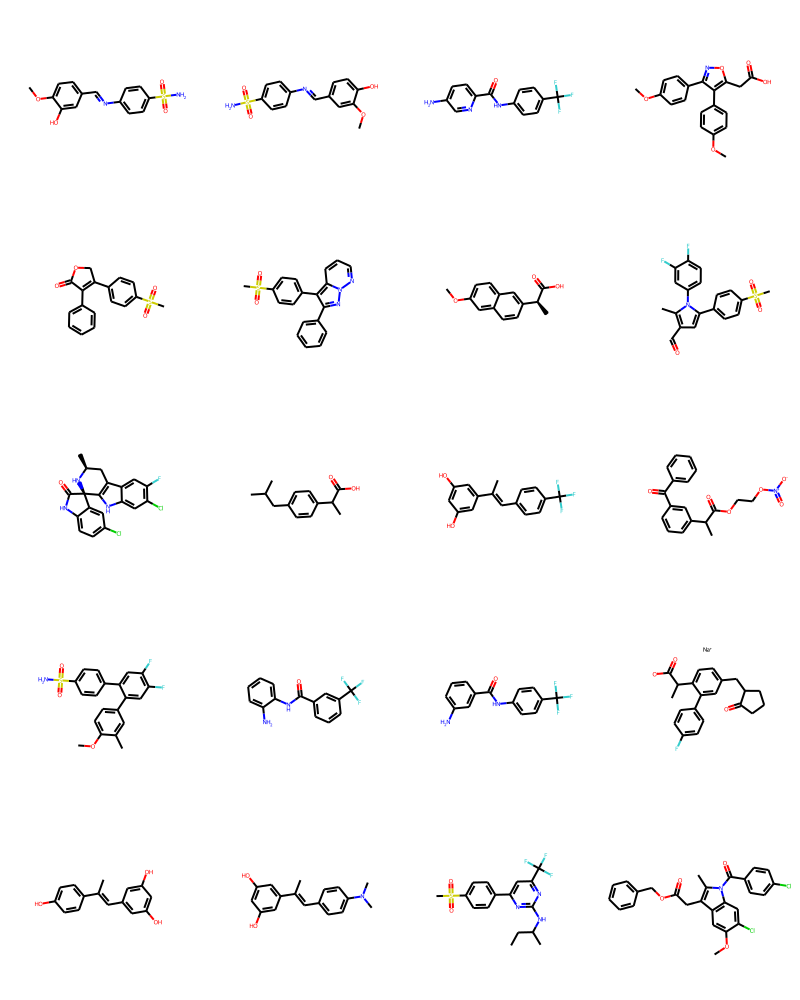

In [46]:
from rdkit.Chem import Draw

print(ligand_rings[:20])
img=Draw.MolsToGridImage(ligand_mols[:20],molsPerRow=4,subImgSize=(200,200))   
img

Počty kruhů opravdu sedí. Vypadá to v pořádku. :) Najděme průměrný počet kruhů. 

In [9]:
sum(ligand_rings)/len(ligand_mols)

3.0787554691298005

3.08 kruhů je průměrný počet kruhů pro inhibitory cyklooxygenázy 1. 

Při porovnání s DrugBank, kde byl průměr 2.46, mají inhibitory COX1 průměrně více kruhů. Důvodem dolišnosti
by mohlo být, že v DrugBank obsahuje léčiva a informace o nich, ChEMBL obsahuje látky, které jsou inhibitory, ale nemusí
se jednat o léčiva. 

# The takeaways
1. Pick a target, get a set of known ligands to that target. Familiarize (seznámit se) yourself a bit with ChEMBL.
2. Download the csv, parse the data into Python, have look at them.
3. Create RDKit Mol instances from the SMILES within the data. Verify that you have parsed all molecules succesfully. If there are only few individual structures that refuse to parse (i.e. return None instead of Mol instance), discard them. If there is a problem in many structures, something is rotten. Upload both the dataset and the notebook anyway so we can have a look at it.
4. Compute the aforedescribed (výše popsané) SSSR (počet kruhů v molekule) for your own dataset. How does your set's average ring count compare to 4.67 of this mTOR set, and to the 2.46 of DrugBank?
5. Put both the csv and your notebook into your work folder and push to this github repository. Have a look how others did it. Compare/comment?